In [2]:
import os
cd=os.getcwd()
print(cd)

C:\Users\HP\OneDrive\wycliffe\Africa Data School\Assignments\Classification


In [28]:
#importing all the packages we will need for our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings("ignore")

In [4]:
#load in the data to be used in the analysis
df = pd.read_csv("C:/Users/HP/OneDrive/wycliffe/Africa Data School/Assignments/Classification/heart.csv")

In [5]:
#get the dimensions of the dataset
print("The shape of the dataset is : ", df.shape)

The shape of the dataset is :  (303, 14)


In [6]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
#Explore the data and separate the continuous variables from the discrete variables.
#First we check the number of uniques values per feature this will aid us with the separation.
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [8]:
#Now separate the continuous and discrete variables
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


In [9]:
#check on the summary statistics of the continuous variables
df[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


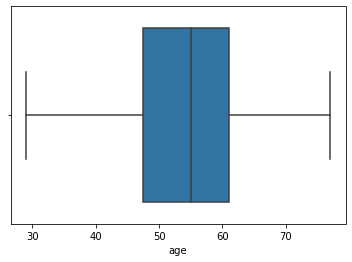

In [12]:
#Identify any presence of outliers in the continuous features and resolve them using the IQR method._age

def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(df.age)

df = df.loc[(df.age > lower) & (df.age < upper)]

sns.boxplot(df.age);

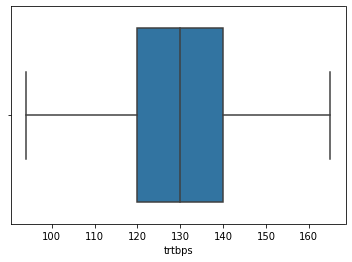

In [14]:
#Identify any presence of outliers in the continuous features and resolve them using the IQR method._trestbps

def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(df.trtbps)

df = df.loc[(df.trtbps > lower) & (df.trtbps < upper)]

sns.boxplot(df.trtbps);

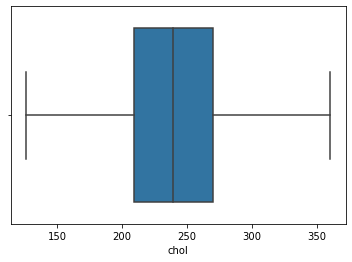

In [15]:
#Identify any presence of outliers in the continuous features and resolve them using the IQR method._chol

def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(df.chol)

df = df.loc[(df.chol > lower) & (df.chol < upper)]

sns.boxplot(df.chol);

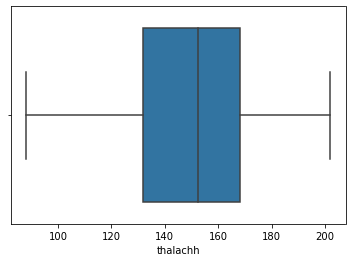

In [17]:
#Identify any presence of outliers in the continuous features and resolve them using the IQR method._thalach

def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(df.thalachh)

df = df.loc[(df.thalachh > lower) & (df.thalachh < upper)]

sns.boxplot(df.thalachh);

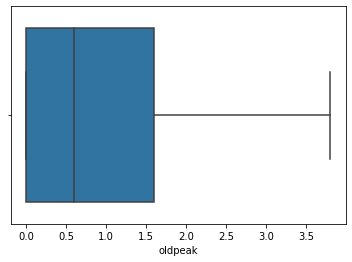

In [18]:
#Identify any presence of outliers in the continuous features and resolve them using the IQR method._oldpeak

def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(df.oldpeak)

df = df.loc[(df.oldpeak > lower) & (df.oldpeak < upper)]

sns.boxplot(df.oldpeak);

In [21]:
# Binned the continuous column values apart from the column ‘oldpeak’.
df['age_binned'] = pd.qcut(df.age, q=[0, .25, .50, .75, 1])
df['chol_binned']= pd.qcut(df.chol, q=[0, .25, .50, .75, 1])
df['thalachh_binned']= pd.qcut(df.thalachh, q=[0, .25, .50, .75, 1])

#####  Modelling

In [23]:
# split data into x and y
X= df.drop(columns = ["output", 'age_binned', 'chol_binned', 'thalachh_binned'], axis= 1)
y= df['output']

In [25]:
#view the target variable
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 279, dtype: int64

In [29]:
# split data into train and the test set
np.random.seed(42)
X_train, X_test, y_train, y_test=  train_test_split(X, y, test_size= 0.2)

In [30]:
#view the train data set
X_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3


In [31]:
#view the train dataset
y_train

282    0
130    1
35     1
89     1
286    0
      ..
196    0
73     1
112    1
293    0
107    1
Name: output, Length: 223, dtype: int64

Data is now splitted, now build we machine learning models, find the patterns on the training set, use the patterns/predictions on the test set

In [32]:
# put models in a dictionary
models= {"Logistic Regression": LogisticRegression(), 
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score (models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different sklearn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # set random seed
    np.random.seed(42)
    # make a dict to keep model scores
    model_scores = {}
    #loop through models
    for name, model in models.items():
        #fit model to the data
        model.fit(X_train, y_train)
        #evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [33]:
#check the performance of the three models used above
model_scores= fit_and_score(models= models,
                           X_train = X_train,
                           X_test= X_test,
                           y_train = y_train,
                           y_test = y_test
                          )
model_scores

{'Logistic Regression': 0.8392857142857143,
 'KNN': 0.6607142857142857,
 'Random Forest': 0.8392857142857143}

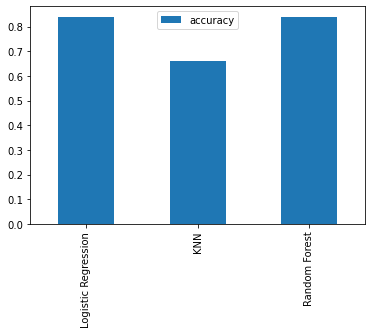

In [34]:
#Visualize the performance of the three models above
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar();

##### Hyper Parameter Tuning

In [35]:
# lets start by tuning knn model
train_score = []
test_score= []

# create a list of different values for n neighbors
neighbors = range (1, 21)
 # set up knn instance
knn = KNeighborsClassifier()
    
#loop
for i in neighbors:
    knn.set_params(n_neighbors =i)
    
    #Fit the algorithm
    knn.fit( X_train, y_train)
    # update
    train_score.append(knn.score(X_train, y_train))
    # update the test score list
    test_score.append(knn.score(X_test, y_test))

In [36]:
train_score

[1.0,
 0.7757847533632287,
 0.7623318385650224,
 0.7399103139013453,
 0.7757847533632287,
 0.757847533632287,
 0.7309417040358744,
 0.7130044843049327,
 0.7040358744394619,
 0.6860986547085202,
 0.695067264573991,
 0.6905829596412556,
 0.6860986547085202,
 0.695067264573991,
 0.7085201793721974,
 0.7040358744394619,
 0.6995515695067265,
 0.695067264573991,
 0.6771300448430493,
 0.6860986547085202]

In [37]:
test_score

[0.6964285714285714,
 0.6428571428571429,
 0.75,
 0.6607142857142857,
 0.6607142857142857,
 0.625,
 0.6428571428571429,
 0.625,
 0.6785714285714286,
 0.6071428571428571,
 0.6785714285714286,
 0.6071428571428571,
 0.6428571428571429,
 0.5892857142857143,
 0.5892857142857143,
 0.6428571428571429,
 0.6785714285714286,
 0.6428571428571429,
 0.6428571428571429,
 0.6428571428571429]

Maximum KNN score on the test data: 75.00%


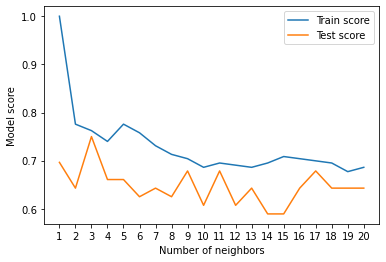

In [38]:
plt.plot(neighbors, train_score, label= "Train score")
plt.plot (neighbors, test_score, label= "Test score")
plt.xticks(np.arange(1, 21,1))
plt.xlabel ('Number of neighbors')
plt.ylabel("Model score")        
plt.legend()

print (f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")

In [39]:
#lets now turn the random forest classifier and the logistic regression using RandomizedSearchCV
# Create a hyperparameter grid
log_reg_grid = {'C': np.logspace (-4,4, 20), 
               'solver': ["liblinear"]}

# create hyperparameter grid for random forest classifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50), 
          "max_depth": ["None", 3, 5, 10],
          "min_samples_split": np.arange (2,20,2),
          'min_samples_leaf': np.arange (1,20, 2)
          }


In [40]:
# tune  losgistic regression
np.random.seed(42)

# hyperparameter search for logreg
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter =20,
                               verbose= True)

# Fit random hyperparameter search for logreg
rs_log_reg.fit (X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [41]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [42]:
rs_log_reg.score(X_test, y_test)

0.8214285714285714

In [43]:
#now tune the Random forest classifier
# set up random seed
np.random.seed(42)

# hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions = rf_grid,
                               cv = 5,
                               n_iter =20,
                               verbose= True)

# Fit random hyperparameter search for logreg
rs_rf.fit (X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': ['None', 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [44]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [45]:
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': 10}

In [46]:
rs_rf.score(X_test, y_test)

0.875

##### Hyper tuning using the grid search method

In [47]:
# Different hyperparamters for our LogReg
log_reg_grid = { "C": np.logspace (-4, 4, 30),
               "solver": ["liblinear"]}

# setup hyperparameter for the LogisticRegression
gs_log_reg = GridSearchCV (LogisticRegression(),
                           param_grid = log_reg_grid,
                           cv= 5,
                           verbose = True)
# Fit grid hyperparameter search model
gs_log_reg.fit (X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [48]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [49]:
# Evaluate the grisearch logreg model
gs_log_reg.score (X_test, y_test)

0.8392857142857143

In [50]:
# make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [51]:
y_preds

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

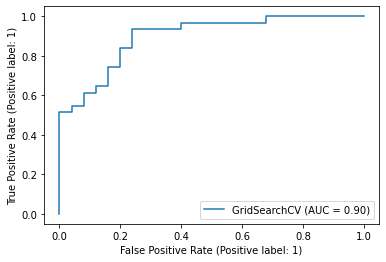

In [52]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

In [53]:
# confusion matrix
print(confusion_matrix(y_test, y_preds))

[[19  6]
 [ 3 28]]


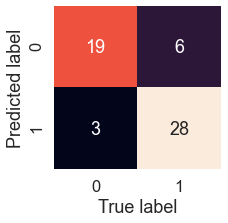

In [54]:
#visualizing the confusion matrix
sns.set(font_scale= 1.5)

def plot_conf_mat (y_test, y_preds):
    fig, ax = plt.subplots (figsize =(3,3))
    ax= sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot= True,
                    cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    
plot_conf_mat(y_test, y_preds)

In [55]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        25
           1       0.82      0.90      0.86        31

    accuracy                           0.84        56
   macro avg       0.84      0.83      0.84        56
weighted avg       0.84      0.84      0.84        56



##### Calculate evaluation metrics using cross-validation

calculating precision, recall and F1 score using corss- validation

In [56]:
# check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [57]:
clf= LogisticRegression(C= 0.20433597178569418, solver= 'liblinear' )

In [58]:
# cross-validated accuracy
from sklearn.model_selection import cross_val_score
cv_acc= cross_val_score(clf,
                       X,
                       y,
                       cv= 5,
                       scoring ="accuracy")
cv_acc

array([0.85714286, 0.82142857, 0.92857143, 0.875     , 0.70909091])

In [59]:
cv_acc= np.mean(cv_acc)
cv_acc

0.8382467532467531

In [60]:
# cross-validated precision
cv_precision= cross_val_score(clf,
                       X,
                       y,
                       cv= 5,
                       scoring ="precision")
cv_precision = np.mean (cv_precision)
cv_precision

0.8204919822179884

In [61]:
# cross-validated recall
cv_recall= cross_val_score(clf,
                       X,
                       y,
                       cv= 5,
                       scoring ="recall")
cv_recall = np.mean (cv_recall)
cv_recall

0.923991935483871

In [62]:
#cross-validated F1-score
cv_f1= cross_val_score(clf,
                       X,
                       y,
                       cv= 5,
                       scoring ="f1")
cv_f1 = np.mean (cv_f1)
cv_f1

0.8677300187374815

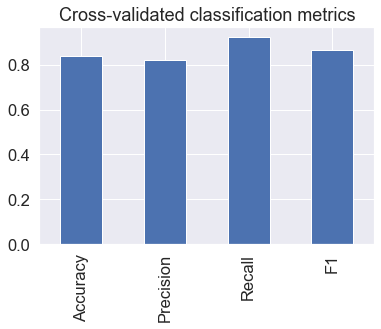

In [63]:
#visualize cros-validated matrix
cv_metrics = pd.DataFrame ({'Accuracy': cv_acc,
                               'Precision': cv_precision,
                               "Recall": cv_recall,
                               "F1": cv_f1},
                              index =[0])

cv_metrics.T.plot.bar(title ='Cross-validated classification metrics',
                     legend = False);

##### Feature Importance

Asking which features contributed the the outcome of the model

In [64]:
# Fit an instance of LogisitcRegression
gs_log_reg.best_params_
clf = LogisticRegression (C =0.20433597178569418,
                         solver = 'liblinear' )

clf.fit(X_train, y_train);


In [65]:
# check coef
clf.coef_

array([[-0.0027442 , -0.76165248,  0.65313374, -0.006586  , -0.00754463,
        -0.11763549,  0.36826219,  0.02991331, -0.33691671, -0.67723754,
         0.31147656, -0.57734034, -0.46803297]])

##### Saving the Model

In [70]:
import pickle
 
# Save the trained model as a pickle string.
classification_model = pickle.dumps(gs_log_reg)
# Load the pickled model
gs_log_reg_from_pickle = pickle.loads(classification_model)
 
# Use the loaded pickled model to make predictions
gs_log_reg_from_pickle.predict(X_test)

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)